# Visualization of network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, multinomial, bernoulli
import time

import random
from numpy.random import seed
%matplotlib inline

from simulation_utils import *
from score_utils import *

In [2]:
random.seed(0)
seed(0)

# parameters
N = 100
K = 3
p_in = 0.2
p_out = 0.
B = (p_in - p_out) * np.identity(K) + p_out * np.ones((K,K))

mu = np.array([0 for i in range(K)])
Sigma = 50 * np.eye(K)


# E, label, Pi, gamma, Z_indicator = generate_LNMMSB(N,K,mu,Sigma,B)
E, label, Pi, gamma, Z_indicator = generate_LNMMSB_symmetry(N,K,mu,Sigma,B)

In [3]:
def visual_network(adj,label = None,color = None):
    # get the row, col indices of the non-zero elements in the adjacency matrix
    conn_indices = np.where(adj)

    # get the edge weights corresponding to these indices
    weights = adj[conn_indices]

    # a sequence of (i, j) tuples, each corresponding to an edge from i -> j
    edges = zip(*conn_indices)

    # initialize the graph from the edge sequence
    G = igraph.Graph(edges=edges, directed=False)

    # assign node names and weights to be attributes of the vertices and edges respectively
    if label is None:
        G.vs['label'] = np.arange(adj.shape[0])
    else:
        G.vs['label'] = label
    col_list = ['red','green','blue']
    G.vs['color'] = [col_list[i] for i in label]
    G.es['weight'] = weights

    # Assign the weights to the 'width' attribute of the edges. This
    # means that igraph.plot will set the line thicknesses according to the edge
    # weights
    G.es['width'] = weights

    # plot the graph
    visual_style = {}
#     visual_style["layout"] = G.layout_kamada_kawai()
#     visual_style["bbox"] = (300, 300)
#     visual_style["margin"] = 10
#     visual_style["layout"] = G.layout_sphere()
#     visual_style["layout"] = G.layout_reingold_tilford()
#     visual_style["layout"] = G.layout_fruchterman_reingold()
    visual_style["layout"] = G.layout_lgl()
#     visual_style["layout"] = G.layout_circle()
    visual_style["labels"] = True

    f = igraph.plot(G, **visual_style)
    # igraph.plot(G, layout="rt", labels=True, margin=10)
    return f

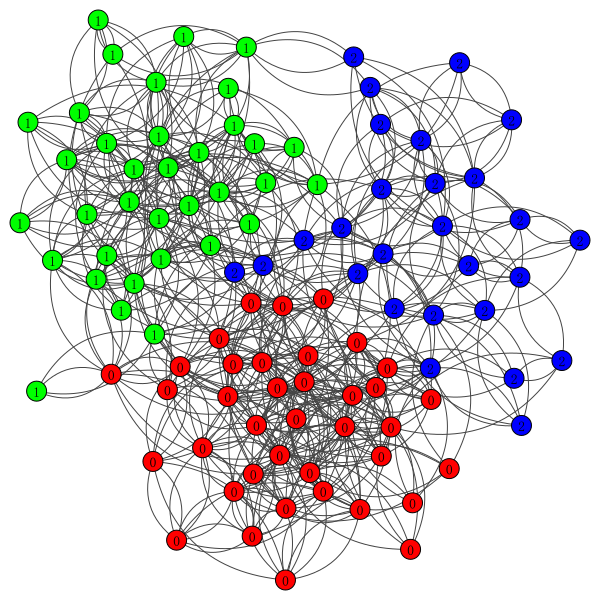

In [4]:
f = visual_network(E,label)
f

In [5]:
result = mix_score(A = E,K = 3)
R = result[0]
vertices = result[2]
centers = result[3]
Pi_hat = result[4]

In [6]:
B_hat = result[8]
print(B_hat.round(4))
print(B)

[[0.1775 0.0183 0.0217]
 [0.0183 0.1584 0.0121]
 [0.0217 0.0121 0.145 ]]
[[0.2 0.  0. ]
 [0.  0.2 0. ]
 [0.  0.  0.2]]


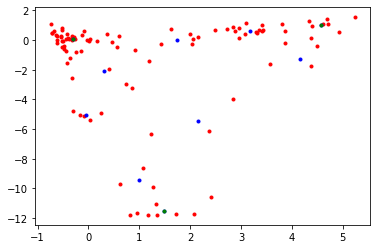

In [7]:
plt.plot(R[:,0],R[:,1],'r.')
plt.plot(centers[:,0],centers[:,1],'b.')
plt.plot(vertices[:,0],vertices[:,1],'g.')

mismatched cluster labels:  2


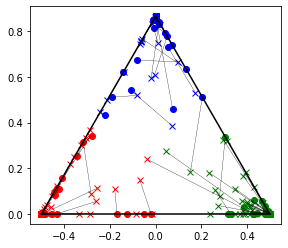

In [8]:
# Pi_hat is shown as 'x' and Pi is shown as 'o'
f = compare_membership(Pi,Pi_hat,use_gamma = False)